https://judgments.ecourts.gov.in/pdfsearch/

In [39]:
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt
import cv2

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

/Users/shubhamgulati/.pyenv/versions/3.10.6/envs/mindcase-scraping/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# Specify the path to the ChromeDriver executable
PATH = r"/Users/shubhamgulati/Downloads/chromedriver-mac-arm64/chromedriver"
# PATH = r"/opt/homebrew/bin/chromedriver"

# Set the ChromeDriver executable path using the Service class
service = webdriver.chrome.service.Service(PATH)

In [5]:
def extract_captcha():
    # Load the CAPTCHA image
    image = cv2.imread("captchaa.png")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    plt.imshow(image)
    plt.show()
    print(generated_text)

    return generated_text

Link opened successfully
Search text entered
Captcha image found
Captcha image saved


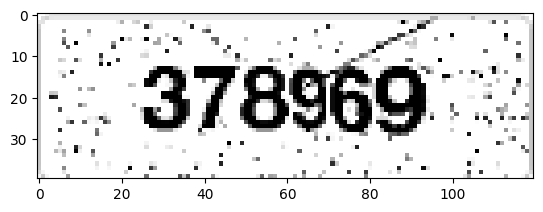

378969
Captcha text extracted
Captcha text entered
Search button clicked


In [51]:
# Create a Chrome WebDriver instance with the service
driver = webdriver.Chrome(service=service)

# Navigate to the URL
driver.get('https://judgments.ecourts.gov.in/pdfsearch/')

print('Link opened successfully') 

wait = WebDriverWait(driver, 10)

# Get search field using the 'search_text' id
search_field = driver.find_element(By.ID, 'search_text')
search_field.send_keys('iim')

print('Search text entered')

# Get captcha image using the 'captcha_image' id
captcha_element = driver.find_element(By.ID, 'captcha_image')

print('Captcha image found')

# Save a screenshot of the CAPTCHA image
with open("captchaa.png", "wb") as captcha_file:
    captcha_file.write(captcha_element.screenshot_as_png)

print('Captcha image saved')

# Extract the CAPTCHA text from the image
captcha_text = extract_captcha()

print('Captcha text extracted')

# Enter captcha text in the 'captcha' text field
captcha_text_element = driver.find_element(By.ID, 'captcha')
captcha_text_element.send_keys(captcha_text)

print('Captcha text entered')

# Click on the 'main_search' button
search_button = driver.find_element(By.ID, 'main_search')
search_button.click()

print('Search button clicked')

In [50]:
# Click button with id 'link_0' to open the first result
link_0 = driver.find_element(By.ID, 'link_0')
link_0.click()

print('Link_0 clicked')

# wait for the new tab to open
wait.until(EC.number_of_windows_to_be(2))

# switch to the new tab
driver.switch_to.window(driver.window_handles[1])

# copy the link of the new tab
link = driver.current_url
print(link)

# download the pdf
destination = '1.pdf'
response = requests.get(link)
with open(destination, 'wb') as output_file:
    output_file.write(response.content)

# close the new tab
driver.close()

# wait to close the link
wait.until(EC.number_of_windows_to_be(1))

print('New tab closed')

# switch back to the original tab
driver.switch_to.window(driver.window_handles[0])

print('Link opened successfully')


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.105)
Stacktrace:
0   chromedriver                        0x000000010128a004 chromedriver + 4169732
1   chromedriver                        0x0000000101281ff8 chromedriver + 4136952
2   chromedriver                        0x0000000100ed7500 chromedriver + 292096
3   chromedriver                        0x0000000100eb02d8 chromedriver + 131800
4   chromedriver                        0x0000000100f43f68 chromedriver + 737128
5   chromedriver                        0x0000000100f56fac chromedriver + 815020
6   chromedriver                        0x0000000100f105e8 chromedriver + 525800
7   chromedriver                        0x0000000100f114b8 chromedriver + 529592
8   chromedriver                        0x0000000101250334 chromedriver + 3932980
9   chromedriver                        0x0000000101254970 chromedriver + 3950960
10  chromedriver                        0x0000000101238774 chromedriver + 3835764
11  chromedriver                        0x0000000101255478 chromedriver + 3953784
12  chromedriver                        0x000000010122aab4 chromedriver + 3779252
13  chromedriver                        0x0000000101271914 chromedriver + 4069652
14  chromedriver                        0x0000000101271a90 chromedriver + 4070032
15  chromedriver                        0x0000000101281c70 chromedriver + 4136048
16  libsystem_pthread.dylib             0x0000000189b43034 _pthread_start + 136
17  libsystem_pthread.dylib             0x0000000189b3de3c thread_start + 8


In [45]:
# given a url which opens a pdf directly, download the pdf


driver.switch_to.window(driver.window_handles[0])


In [58]:
def download_pdf(index, id):
    # Click button with id 'link_0' to open the first result
    link = driver.find_element(By.ID, 'link_' + str(id))
    print(link.text)
    return
    link.click()

    print('Link_' + str(id) + ' clicked')

    # wait for the new tab to open
    wait.until(EC.number_of_windows_to_be(2))

    # switch to the new tab
    driver.switch_to.window(driver.window_handles[1])

    # copy the link of the new tab
    url = driver.current_url
    print(url)

    # download the pdf
    destination = 'pdfs/' + str(index) + '.pdf'
    response = requests.get(url)
    with open(destination, 'wb') as output_file:
        output_file.write(response.content)

    # close the new tab
    driver.close()

    # wait to close the link
    wait.until(EC.number_of_windows_to_be(1))

    print('New tab closed')

    # switch back to the original tab
    driver.switch_to.window(driver.window_handles[0])

    print('Link opened successfully')

In [57]:
# call the download function 36068 times and after every 10 calls go to the next page
for i in range(0, 36068):
    download_pdf(i, i % 10)
    if i % 10 == 9:
        # click button with id 'example_pdf_next'
        driver.find_element(By.ID, 'example_pdf_next').click()
        wait.until(EC.number_of_windows_to_be(1))

Link_0 clicked
https://judgments.ecourts.gov.in//judgments_lib/tmp/e9a0b10ee50343a274c9b4b8936487926fb8fe7db426d8fdbc67d1686ae775c31699439551.pdf
New tab closed
Link opened successfully


In [56]:
driver.switch_to.window(driver.window_handles[0])